In [27]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import warnings


warnings.filterwarnings('ignore')


In [4]:
heartFailurePredict_dataset = pd.read_csv('heartFailurePredict.csv')

print(heartFailurePredict_dataset.shape)

heartFailurePredict_dataset.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
heartFailurePredict_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Preprocessing

In [6]:
heartFailurePredict_dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
cat_columns = heartFailurePredict_dataset.columns[(heartFailurePredict_dataset.dtypes =='object').values].tolist()
cat_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
num_columns = heartFailurePredict_dataset.columns[(heartFailurePredict_dataset.dtypes !='object').values].tolist()
num_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [10]:
heartFailurePredict_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
heartFailurePredict_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [12]:
for i in heartFailurePredict_dataset.columns[(heartFailurePredict_dataset.dtypes =='object').values].tolist():
    print(i,'\n\n')
    print(heartFailurePredict_dataset[i].value_counts())
    print('=====================================')
    print('=====================================')

Sex 


M    725
F    193
Name: Sex, dtype: int64
ChestPainType 


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG 


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina 


N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope 


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [13]:
heartFailurePredict_dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Visualization

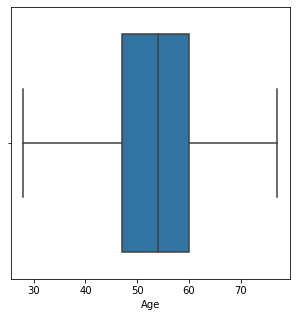

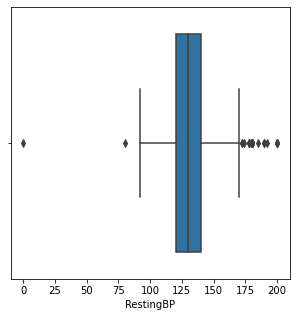

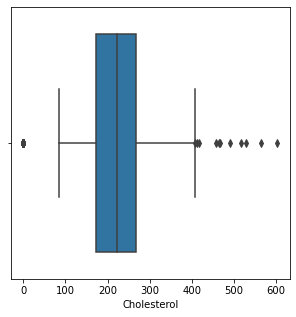

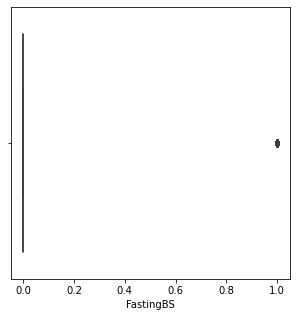

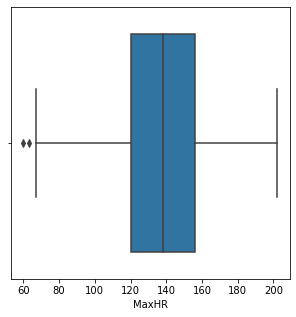

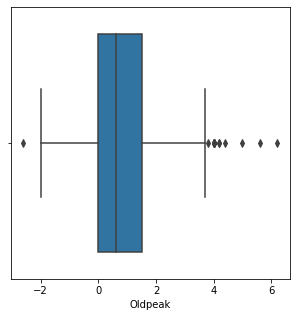

In [19]:
features = [
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak']

for col in features:
    plt.figure(figsize=(5,5))
    sns.boxplot(heartFailurePredict_dataset[col])

In [20]:
for column in heartFailurePredict_dataset:
    unique_vals = np.unique(heartFailurePredict_dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The amount of possible options for a feature {} : {} => {}'.format(column, nr_values,unique_vals))
    else:
        print('The amount of possible options for a feature {} : {}'.format(column, nr_values))

The amount of possible options for a feature Age : 50
The amount of possible options for a feature Sex : 2 => ['F' 'M']
The amount of possible options for a feature ChestPainType : 4 => ['ASY' 'ATA' 'NAP' 'TA']
The amount of possible options for a feature RestingBP : 67
The amount of possible options for a feature Cholesterol : 222
The amount of possible options for a feature FastingBS : 2 => [0 1]
The amount of possible options for a feature RestingECG : 3 => ['LVH' 'Normal' 'ST']
The amount of possible options for a feature MaxHR : 119
The amount of possible options for a feature ExerciseAngina : 2 => ['N' 'Y']
The amount of possible options for a feature Oldpeak : 53
The amount of possible options for a feature ST_Slope : 3 => ['Down' 'Flat' 'Up']
The amount of possible options for a feature HeartDisease : 2 => [0 1]


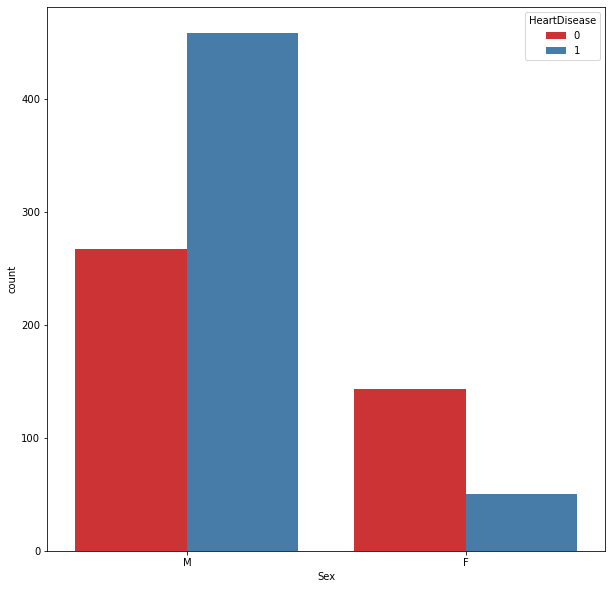

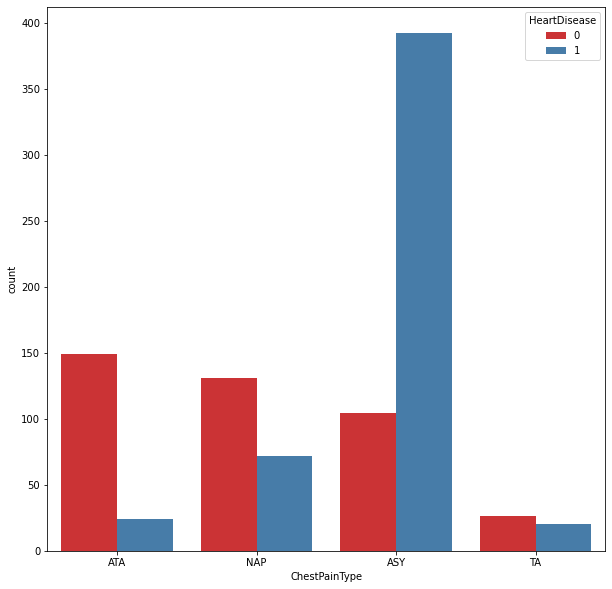

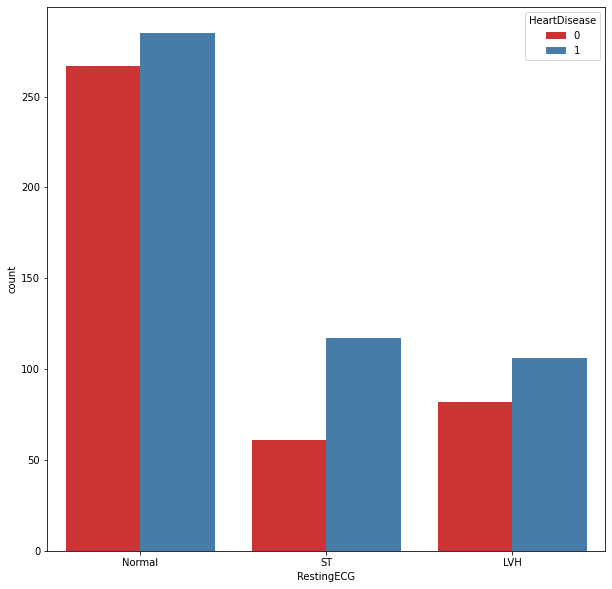

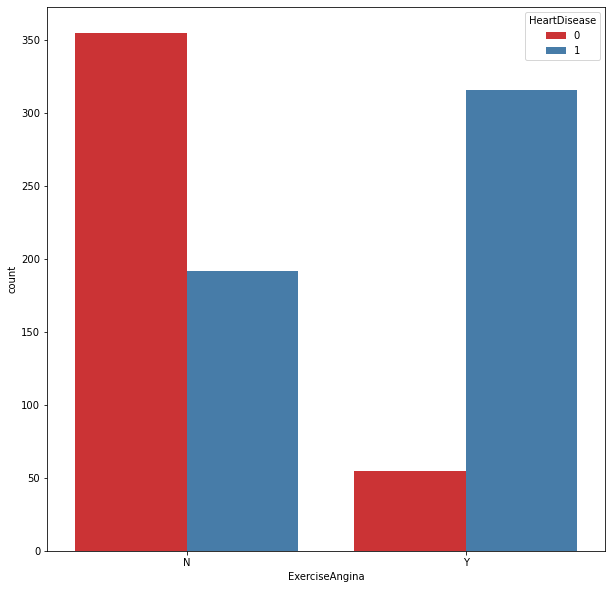

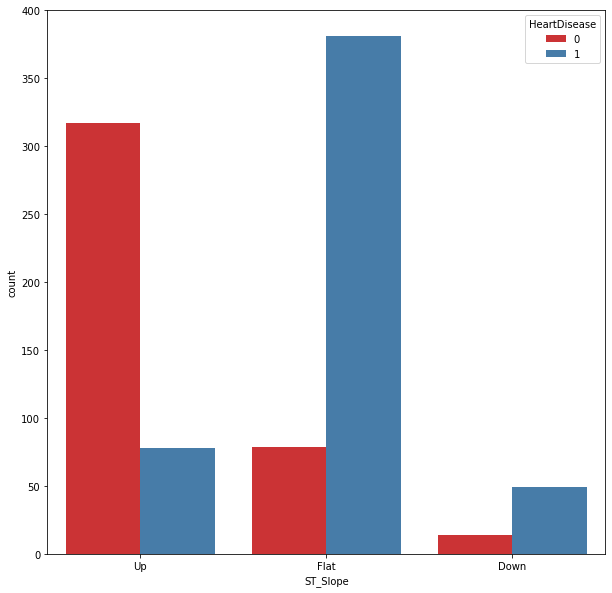

In [21]:
features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for f in features:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(x=f, data=heartFailurePredict_dataset, hue = 'HeartDisease', palette="Set1")

## Feature selection

In [23]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        heartFailurePredict_dataset[col] = globals()['LE_{}'.format(col)].fit_transform(heartFailurePredict_dataset[col])

heartFailurePredict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [24]:
for column in heartFailurePredict_dataset:
    unique_vals = np.unique(heartFailurePredict_dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The amount of possible options for a feature {} : {} => {}'.format(column, nr_values,unique_vals))
    else:
        print('The amount of possible options for a feature {} : {}'.format(column, nr_values))

The amount of possible options for a feature Age : 50
The amount of possible options for a feature Sex : 2 => [0 1]
The amount of possible options for a feature ChestPainType : 4 => [0 1 2 3]
The amount of possible options for a feature RestingBP : 67
The amount of possible options for a feature Cholesterol : 222
The amount of possible options for a feature FastingBS : 2 => [0 1]
The amount of possible options for a feature RestingECG : 3 => [0 1 2]
The amount of possible options for a feature MaxHR : 119
The amount of possible options for a feature ExerciseAngina : 2 => [0 1]
The amount of possible options for a feature Oldpeak : 53
The amount of possible options for a feature ST_Slope : 3 => [0 1 2]
The amount of possible options for a feature HeartDisease : 2 => [0 1]


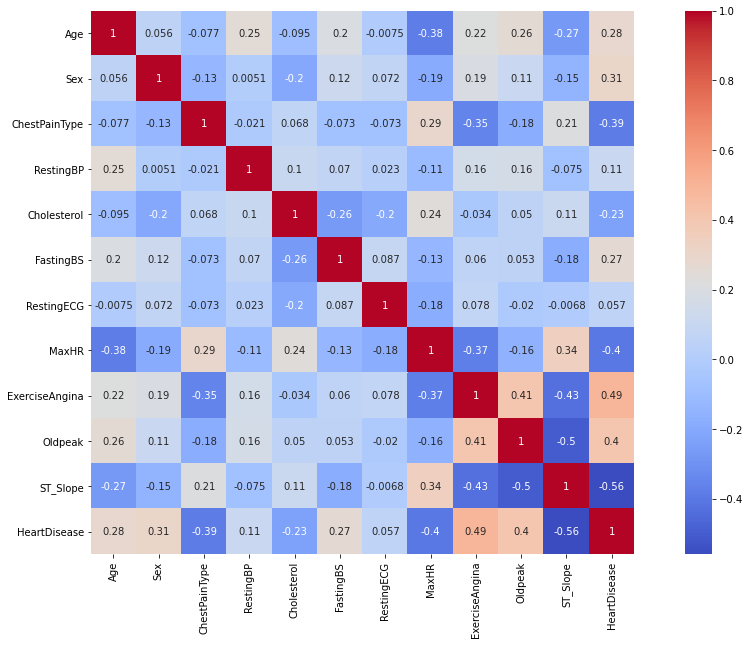

In [25]:
plt.figure(figsize = (18,10))
sns.heatmap(heartFailurePredict_dataset.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [28]:
# Split to training and Testing
X = heartFailurePredict_dataset.drop('HeartDisease', axis=1)
y = heartFailurePredict_dataset['HeartDisease']
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train shape : {}'.format(np.shape(X_train)))
print('X_test shape : {}'.format(np.shape(X_test)))

X shape: (918, 11)
y shape: (918,)
X_train shape : (642, 11)
X_test shape : (276, 11)
